In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Обработка данных

In [4]:
print(df.isnull().sum())
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(df.duplicated().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
0


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## EDA

In [6]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

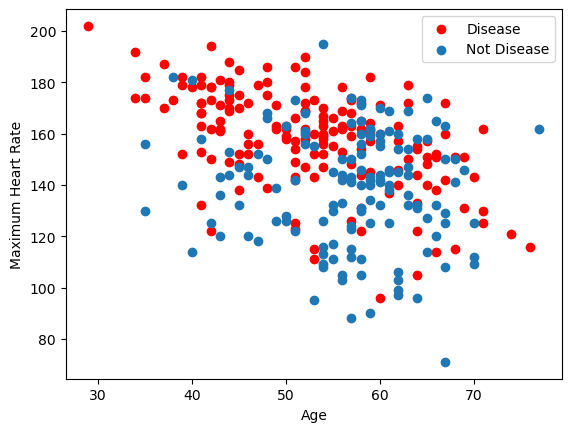

In [7]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

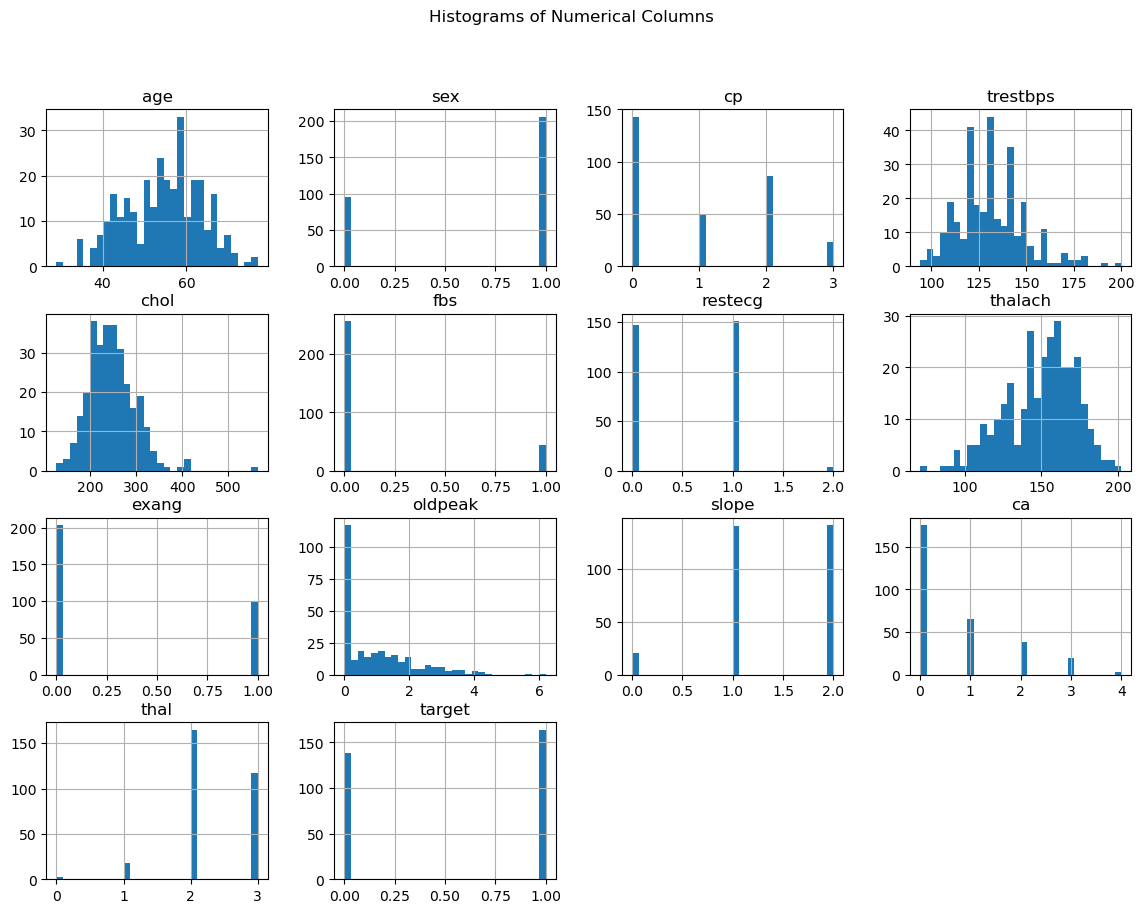

In [8]:
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(figsize=(14, 10), bins=30)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

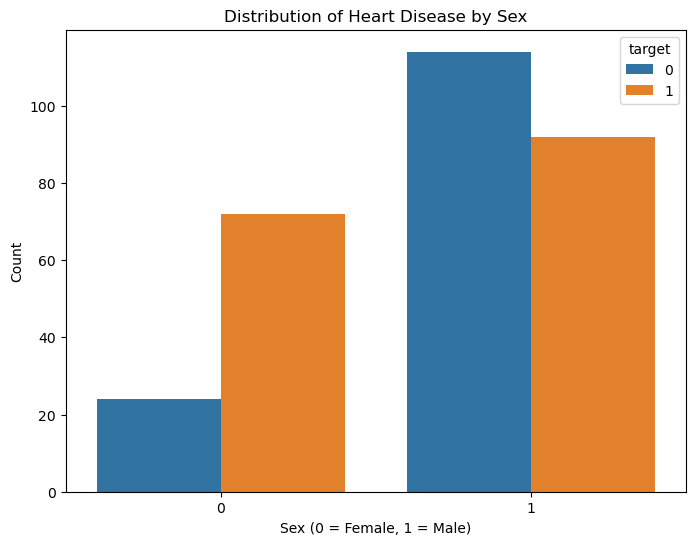

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="target", data=df)
plt.title("Distribution of Heart Disease by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

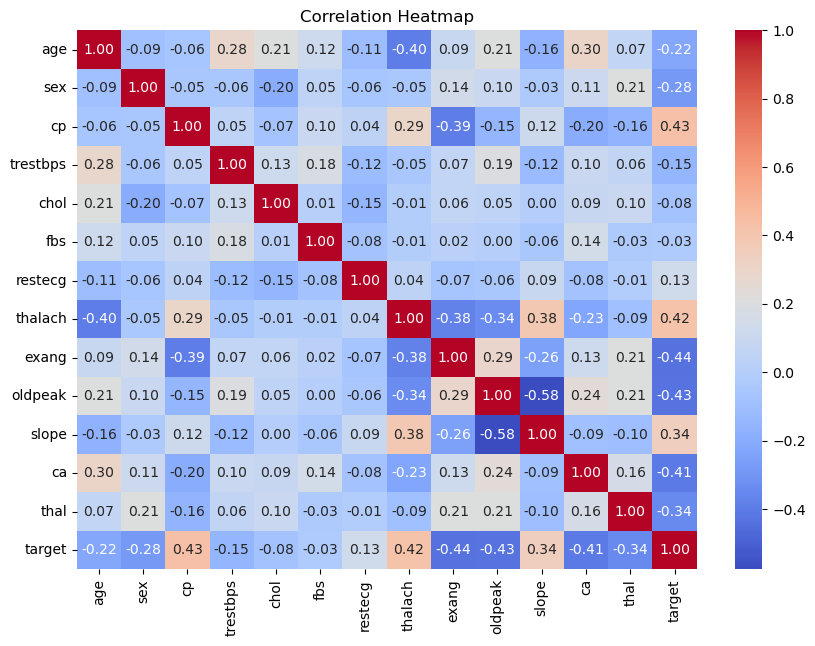

In [10]:
plt.figure(figsize=(10,7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## DecisionTree (Custom Implementation)

$H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)$

In [11]:
class DecisionTree:
    def __init__(self, max_depth=None,entropy_threshold=0.7):
        self.max_depth = max_depth
        self.entropy_threshold = entropy_threshold
        self.tree = None
    def _calculate_entropy(self, y):
        classes = np.unique(y)
        entropy = 0.0
        for c in classes:
            p = np.sum(y == c) / len(y)
            entropy -= p * np.log2(p) if p > 0 else 0
        return entropy
    def _best_split(self, X, y):
        best_entropy = float("inf")
        bes_split = None
        for feature_index in range(X.shape[1]):
            sorted_indices = np.argsort(X[:, feature_index])
            sorted_X = X[sorted_indices]
            sorted_y = y.values[sorted_indices]
            
            for i in range(1, len(y)):
                left_y = sorted_y[:i]
                right_y = sorted_y[i:]

                left_entropy = self._calculate_entropy(left_y)
                right_entropy = self._calculate_entropy(right_y)
            
                entropy = (len(left_y) * left_entropy + len(right_y) * right_entropy) / len(y)
            
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_split = (feature_index, (sorted_X[i-1, feature_index] + sorted_X[i, feature_index]) / 2)
        return best_split
    
    def _build_tree(self, X, y, depth=0):

        current_entropy = self._calculate_entropy(y)
        if (self.max_depth is not None and depth >= self.max_depth) or current_entropy <= self.entropy_threshold:
            return np.bincount(y).argmax()
        feature_index, threshold = self._best_split(X, y)
        
        if feature_index is None:
            return np.bincount(y).argmax()
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        

        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return np.bincount(y).argmax()
        
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        
        return {
            "feature_index": feature_index,
            "threshold": threshold,
            "left": left_tree,
            "right": right_tree
        }
        
        
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _predict_single(self, x, tree):
        if isinstance(tree, dict):
            feature_index = tree["feature_index"]
            threshold = tree["threshold"]
            
            if x[feature_index] <= threshold:
                return self._predict_single(x, tree["left"])
            else:
                return self._predict_single(x, tree["right"])
        else:
            return tree
    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])
    
    def get_params(self, deep=True):
        return {"max_depth": self.max_depth, "entropy_threshold": self.entropy_threshold}
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
X = df.drop(columns='target')
y = df['target'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Choose the best parameters

In [15]:
results = []
depth_values = [4, 5]
entropy_values = [0.7, 0.9]
for depth in depth_values:
    for entropy in entropy_values:
        Tree = DecisionTree(max_depth=depth, entropy_threshold=entropy)
        Tree.fit(X_train_scaled, y_train)
        y_pred = Tree.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Max Depth": depth, "Entropy Threshold": entropy, "Accuracy": accuracy})
results_df = pd.DataFrame(results)
results_df

,Max Depth,Entropy Threshold,Accuracy
0,4,0.7,0.754098
1,4,0.9,0.704918
2,5,0.7,0.721311
3,5,0.9,0.704918


In [16]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Tree = DecisionTree(max_depth=4, entropy_threshold=0.7)
cv_scores = cross_val_score(Tree, X_scaled, y, cv=5, scoring='accuracy')
print(f"DecisionTree Cross-Validation Scores: {cv_scores}")
print(f"DecisionTree Mean Accuracy: {cv_scores.mean()}")

DecisionTree Cross-Validation Scores: [0.72131148 0.75409836 0.58333333 0.71666667 0.76666667]
DecisionTree Mean Accuracy: 0.7084153005464481


In [17]:
cm_DecisionTree = confusion_matrix(y_test, y_pred)
cm_DecisionTree

array([[24,  8],
       [10, 19]], dtype=int64)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pre = log_reg.predict(X_test_scaled)
cv_scores_lr = cross_val_score(log_reg, X_scaled, y, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cv_scores_lr}")
print(f"Logistic Regression Mean Accuracy: {cv_scores_lr.mean()}")
cm_LogisticRegression = confusion_matrix(y_test, y_pred)
cm_LogisticRegression

Logistic Regression Cross-Validation Scores: [0.83606557 0.78688525 0.93333333 0.76666667 0.78333333]
Logistic Regression Mean Accuracy: 0.821256830601093


array([[24,  8],
       [10, 19]], dtype=int64)

## SVM

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
cv_scores_svm = cross_val_score(svm, X_scaled, y, cv=5)
cm_SVC = confusion_matrix(y_test, y_pred)
print(f"SVM Cross-Validation Scores: {cv_scores_svm}")
print(f"SVM Mean Accuracy: {cv_scores_svm.mean()}")
cm_SVC

SVM Cross-Validation Scores: [0.85245902 0.78688525 0.93333333 0.76666667 0.78333333]
SVM Mean Accuracy: 0.8245355191256831


array([[23,  9],
       [ 5, 24]], dtype=int64)

## KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
cv_scores_knn = cross_val_score(knn, X_scaled, y, cv=5)
cm_KNN = confusion_matrix(y_test, y_pred)
print(f"KNN Cross-Validation Scores: {cv_scores_knn}")
print(f"KNN Mean Accuracy: {cv_scores_knn.mean()}")
cm_KNN


KNN Cross-Validation Scores: [0.83606557 0.81967213 0.88333333 0.8        0.75      ]
KNN Mean Accuracy: 0.8178142076502732


array([[22, 10],
       [ 6, 23]], dtype=int64)

## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
cv_scores_nb = cross_val_score(nb, X_scaled, y, cv=5)
cm_NB = confusion_matrix(y_test, y_pred)
print(f"Naive Bayes Cross-Validation Scores: {cv_scores_nb}")
print(f"Naive Bayes Mean Accuracy: {cv_scores_nb.mean()}")
cm_NB


Naive Bayes Cross-Validation Scores: [0.85245902 0.81967213 0.9        0.71666667 0.75      ]
Naive Bayes Mean Accuracy: 0.80775956284153


array([[27,  5],
       [ 4, 25]], dtype=int64)

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
cv_scores_tree = cross_val_score(tree, X_scaled, y, cv=5)
cm_Tree = confusion_matrix(y_test, y_pred)
print(f"Decision Tree Cross-Validation Scores: {cv_scores_tree}")
print(f"Decision Tree Mean Accuracy: {cv_scores_tree.mean()}")
cm_Tree

Decision Tree Cross-Validation Scores: [0.7704918  0.80327869 0.78333333 0.63333333 0.73333333]
Decision Tree Mean Accuracy: 0.7447540983606558


array([[23,  9],
       [ 7, 22]], dtype=int64)

## Draw ConfusionMatrix

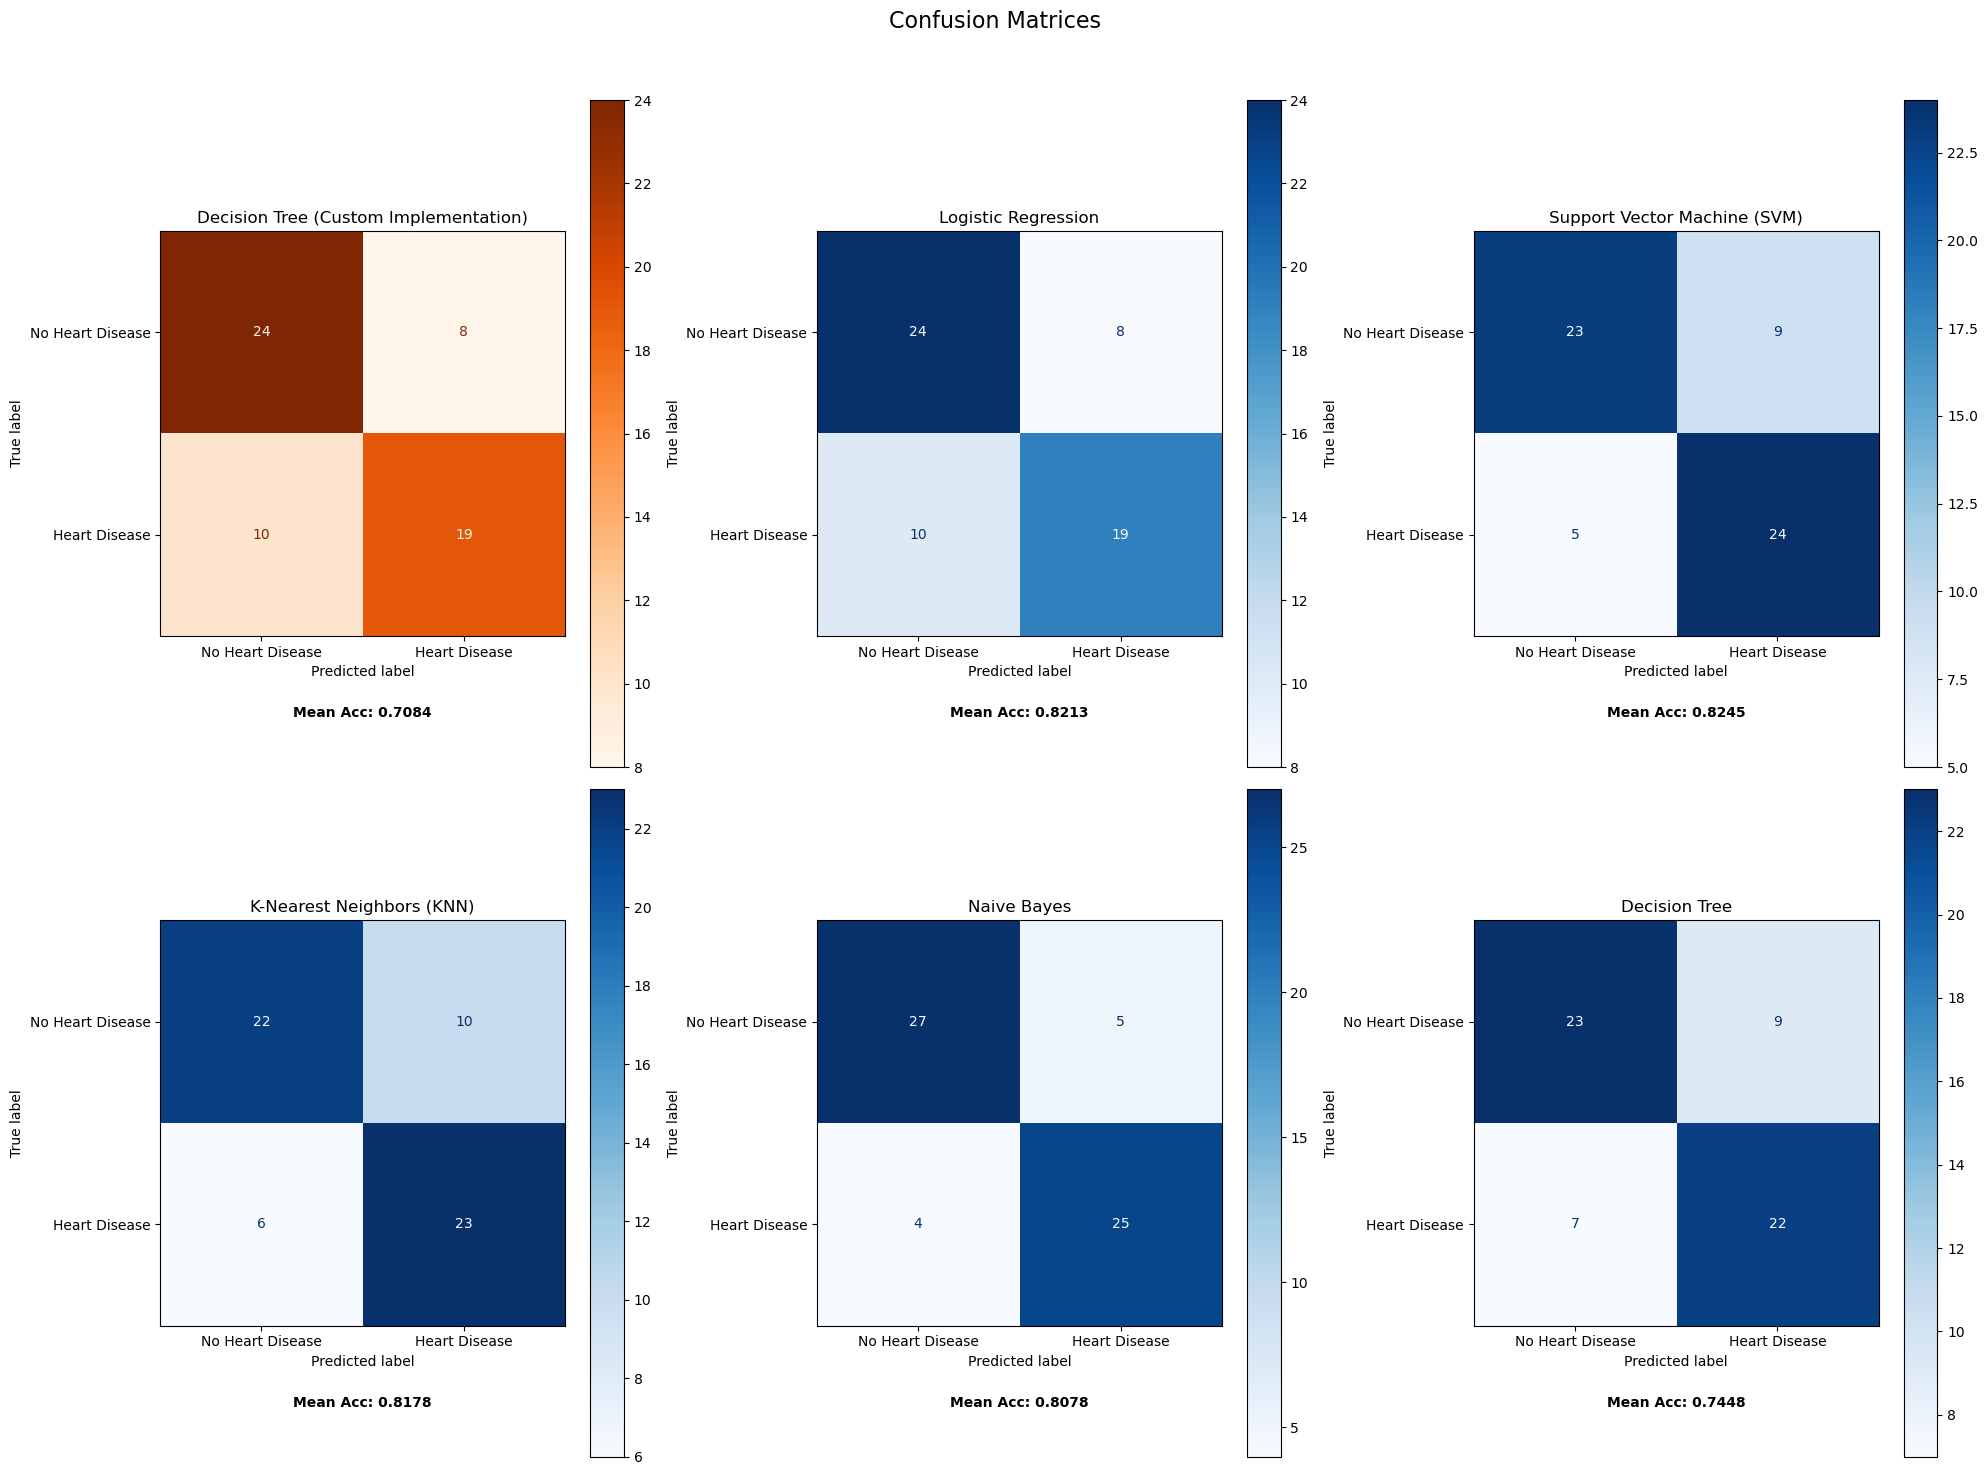

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
display_labels = ['No Heart Disease', 'Heart Disease']

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_DecisionTree, display_labels=display_labels)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_LogisticRegression, display_labels=display_labels)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_SVC, display_labels=display_labels)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=display_labels)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=display_labels)
disp_Tree = ConfusionMatrixDisplay(confusion_matrix=cm_Tree, display_labels=display_labels)

disp_tree.plot(cmap='Oranges', ax=axes[0, 0])
axes[0, 0].set_title("Decision Tree (Custom Implementation)")
axes[0, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores.mean()):.4f}", 
                transform=axes[0, 0].transAxes, ha='center',weight='bold')
disp_log_reg.plot(cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Logistic Regression")
axes[0, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_lr.mean()):.4f}", 
                transform=axes[0, 1].transAxes, ha='center',weight='bold')
disp_svc.plot(cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title("Support Vector Machine (SVM)")
axes[0, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_svm.mean()):.4f}", 
                transform=axes[0, 2].transAxes, ha='center',weight='bold')
disp_knn.plot(cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title("K-Nearest Neighbors (KNN)")
axes[1, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores_knn.mean()):.4f}", 
                transform=axes[1, 0].transAxes, ha='center',weight='bold')
disp_nb.plot(cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title("Naive Bayes")
axes[1, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_nb.mean()):.4f}", 
                transform=axes[1, 1].transAxes, ha='center',weight='bold')
disp_Tree.plot(cmap='Blues', ax=axes[1, 2])
axes[1, 2].set_title("Decision Tree")
axes[1, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_tree.mean()):.4f}", 
                transform=axes[1, 2].transAxes, ha='center',weight='bold')

plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Logistic Regression(Custom Implementation)

In [25]:
class LRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def initialize_parameters(self, n_features):
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        return self
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return np.where(proba >= threshold, 1, 0)
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'num_iterations': self.num_iterations}
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [26]:
LR = LRegression(0.01,1000)
LR.fit(X_train_scaled,y_train)
y_pred_lr = LR.predict(X_test_scaled)

cv_scores_lr = cross_val_score(LR, X_scaled, y, cv=5)

cm_LR = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression(Custom Implementation) Cross-Validation Scores: {cv_scores_lr}")
print(f"Logistic Regression(Custom Implementation) Mean Accuracy: {cv_scores_lr.mean()}")
cm_LR

Logistic Regression(Custom Implementation) Cross-Validation Scores: [0.80327869 0.81967213 0.91666667 0.8        0.78333333]
Logistic Regression(Custom Implementation) Mean Accuracy: 0.8245901639344263


array([[24,  8],
       [ 2, 27]], dtype=int64)

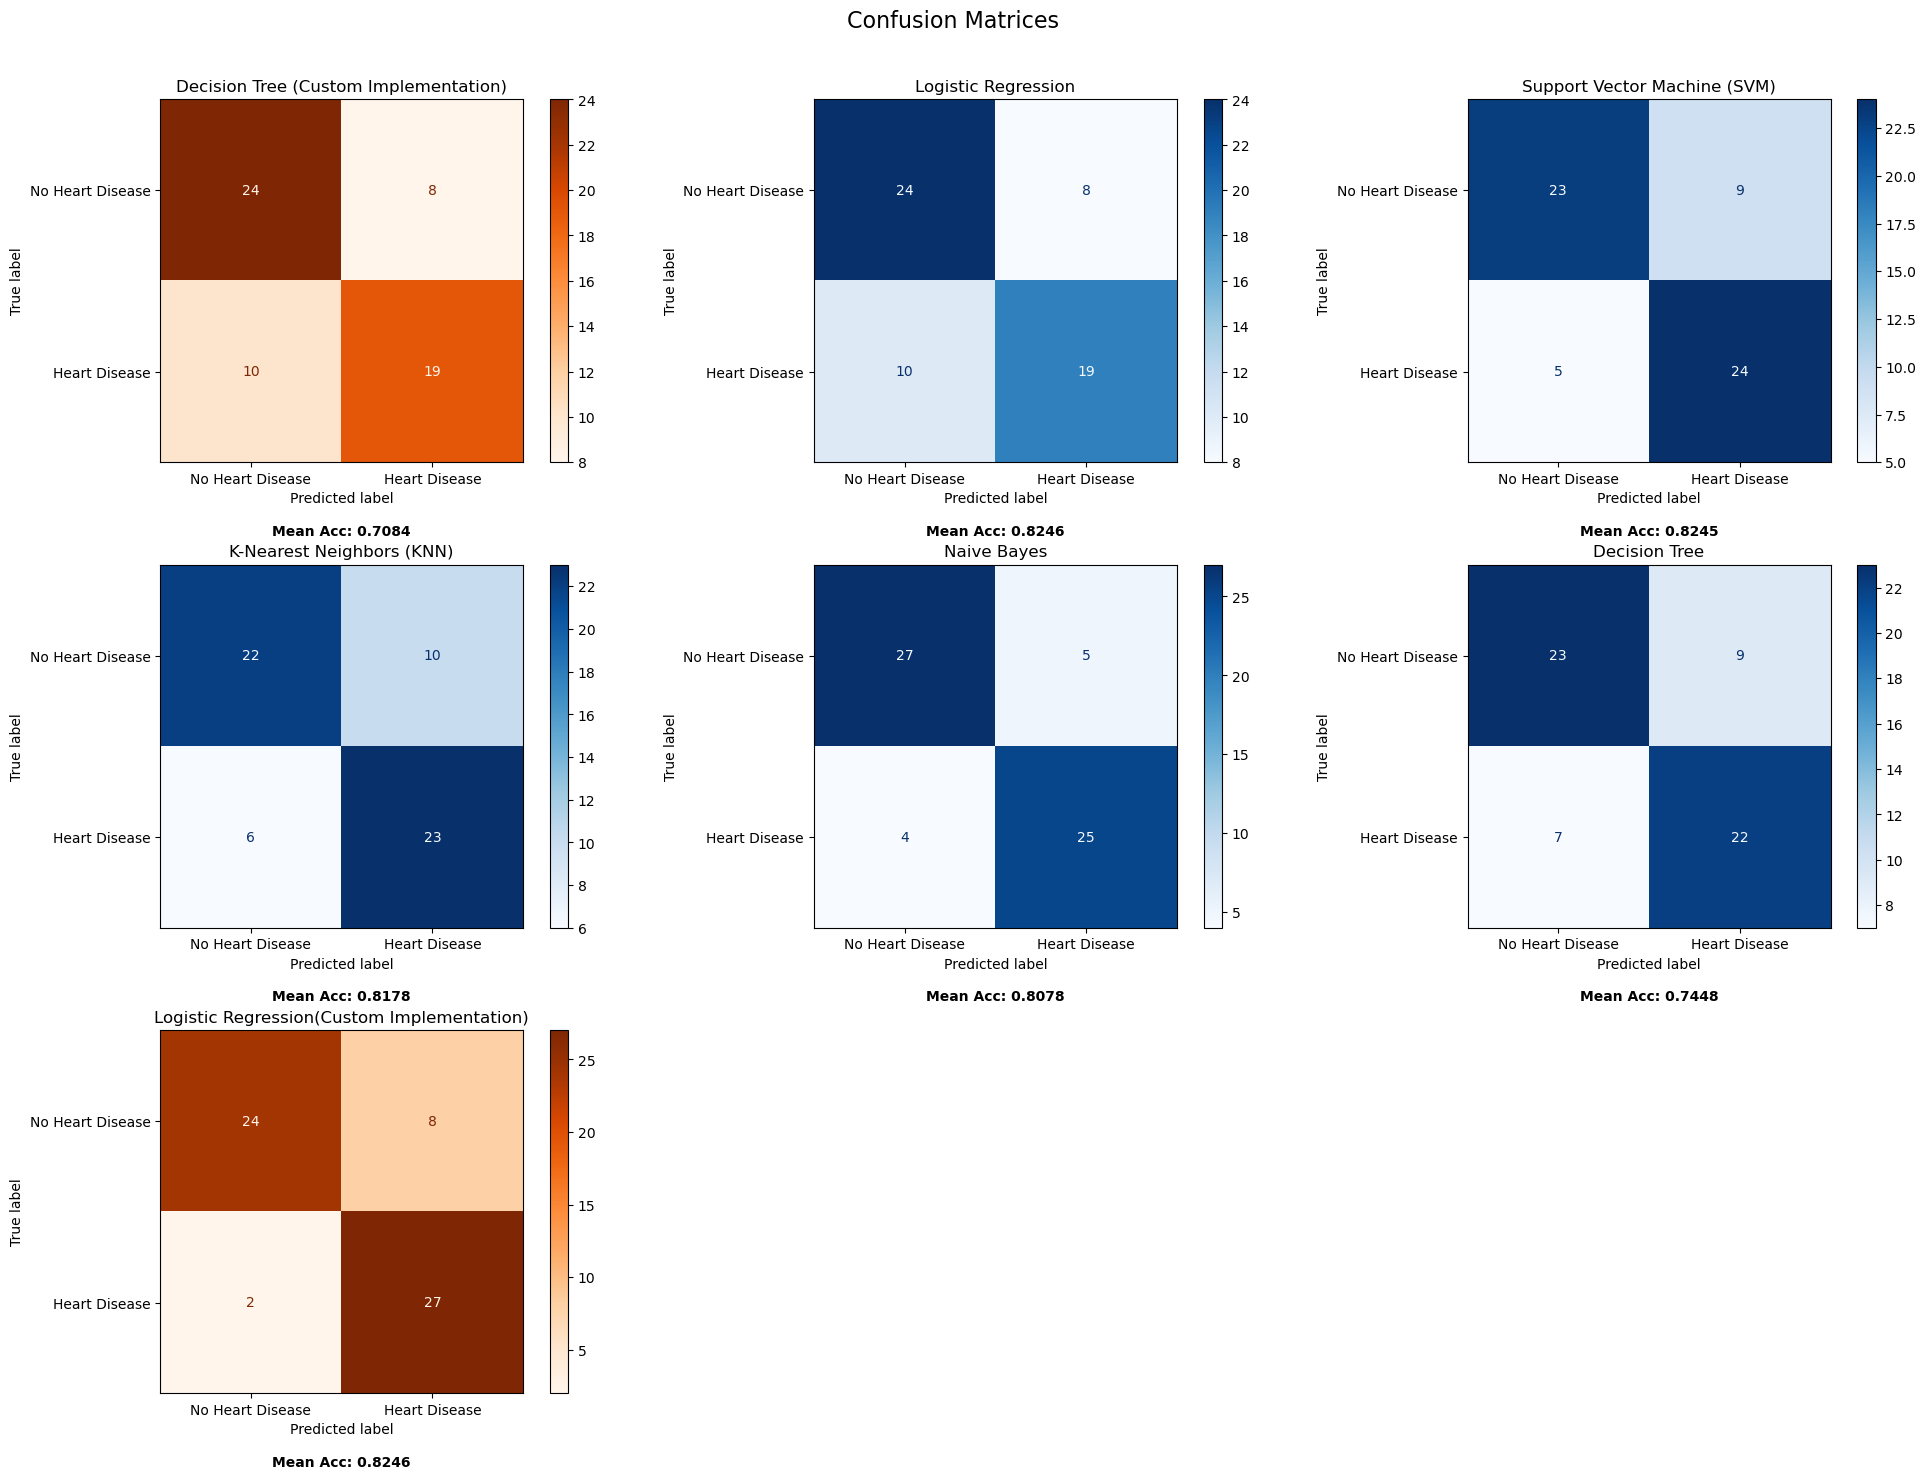

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
display_labels = ['No Heart Disease', 'Heart Disease']

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_DecisionTree, display_labels=display_labels)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_LogisticRegression, display_labels=display_labels)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_SVC, display_labels=display_labels)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=display_labels)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=display_labels)
disp_Tree = ConfusionMatrixDisplay(confusion_matrix=cm_Tree, display_labels=display_labels)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=display_labels)

disp_tree.plot(cmap='Oranges', ax=axes[0, 0])
axes[0, 0].set_title("Decision Tree (Custom Implementation)")
axes[0, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores.mean()):.4f}", 
                transform=axes[0, 0].transAxes, ha='center',weight='bold')
disp_log_reg.plot(cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Logistic Regression")
axes[0, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_lr.mean()):.4f}", 
                transform=axes[0, 1].transAxes, ha='center',weight='bold')
disp_svc.plot(cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title("Support Vector Machine (SVM)")
axes[0, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_svm.mean()):.4f}", 
                transform=axes[0, 2].transAxes, ha='center',weight='bold')
disp_knn.plot(cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title("K-Nearest Neighbors (KNN)")
axes[1, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores_knn.mean()):.4f}", 
                transform=axes[1, 0].transAxes, ha='center',weight='bold')
disp_nb.plot(cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title("Naive Bayes")
axes[1, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_nb.mean()):.4f}", 
                transform=axes[1, 1].transAxes, ha='center',weight='bold')
disp_Tree.plot(cmap='Blues', ax=axes[1, 2])
axes[1, 2].set_title("Decision Tree")
axes[1, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_tree.mean()):.4f}", 
                transform=axes[1, 2].transAxes, ha='center',weight='bold')

disp_lr.plot(cmap='Oranges', ax=axes[2, 0])
axes[2, 0].set_title("Logistic Regression(Custom Implementation)")
axes[2, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores_lr.mean()):.4f}", 
                transform=axes[2, 0].transAxes, ha='center',weight='bold')

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])


plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

######  В двоичной классификации единственный недостаток заключается в модели классификации дерева решений, что, вероятно, связано с отсутствием предварительного обрезания, что приводит к незначительному переобучению модели.

## Three classification data set

In [28]:
df = pd.read_csv("seeds_dataset.txt", delimiter=r'\s+', header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [29]:
X = df.loc[:,0:6]
y = df.loc[:,7] - 1

In [45]:
y = pd.Series(y)
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: 7, Length: 210, dtype: int64

In [46]:
features= [
    "Area","Perimeter","Compactness","Kernel Length","Kernel Width",
    "Asymmetry Coefficient","Kernel Groove Length"]
class_names = ["Kama","Rosa","Canadian"]

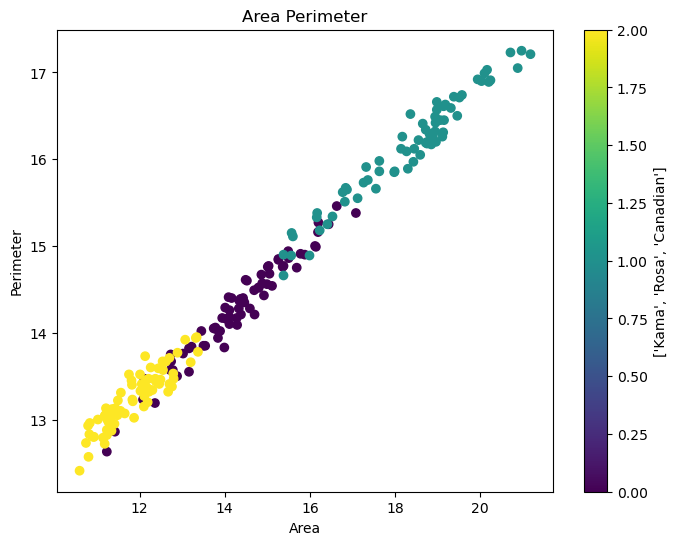

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap='viridis')
plt.xlabel(features[0])  # sepal length (cm)
plt.ylabel(features[1])  # sepal width (cm)
plt.title('Area Perimeter')
plt.colorbar(label=class_names)
plt.show()

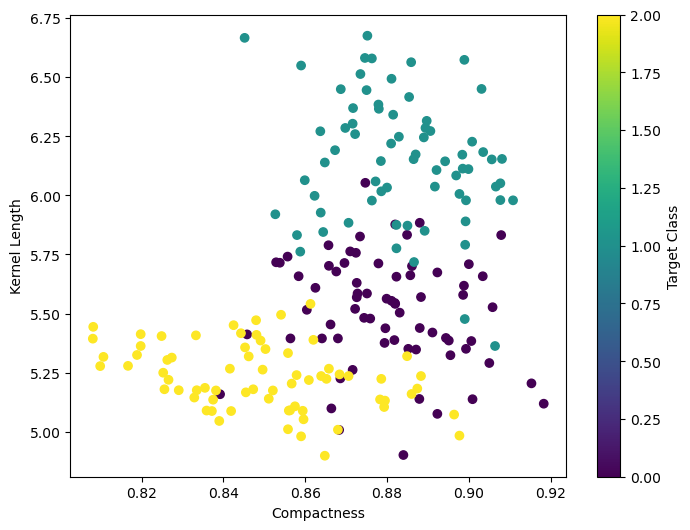

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(X.loc[:, 2], X.loc[:, 3], c=y, cmap='viridis')
plt.xlabel(features[2])  # petal length (cm)
plt.ylabel(features[3])  # petal width (cm)
#plt.title('Petal Length vs Petal Width')
plt.colorbar(label='Target Class')
plt.show()

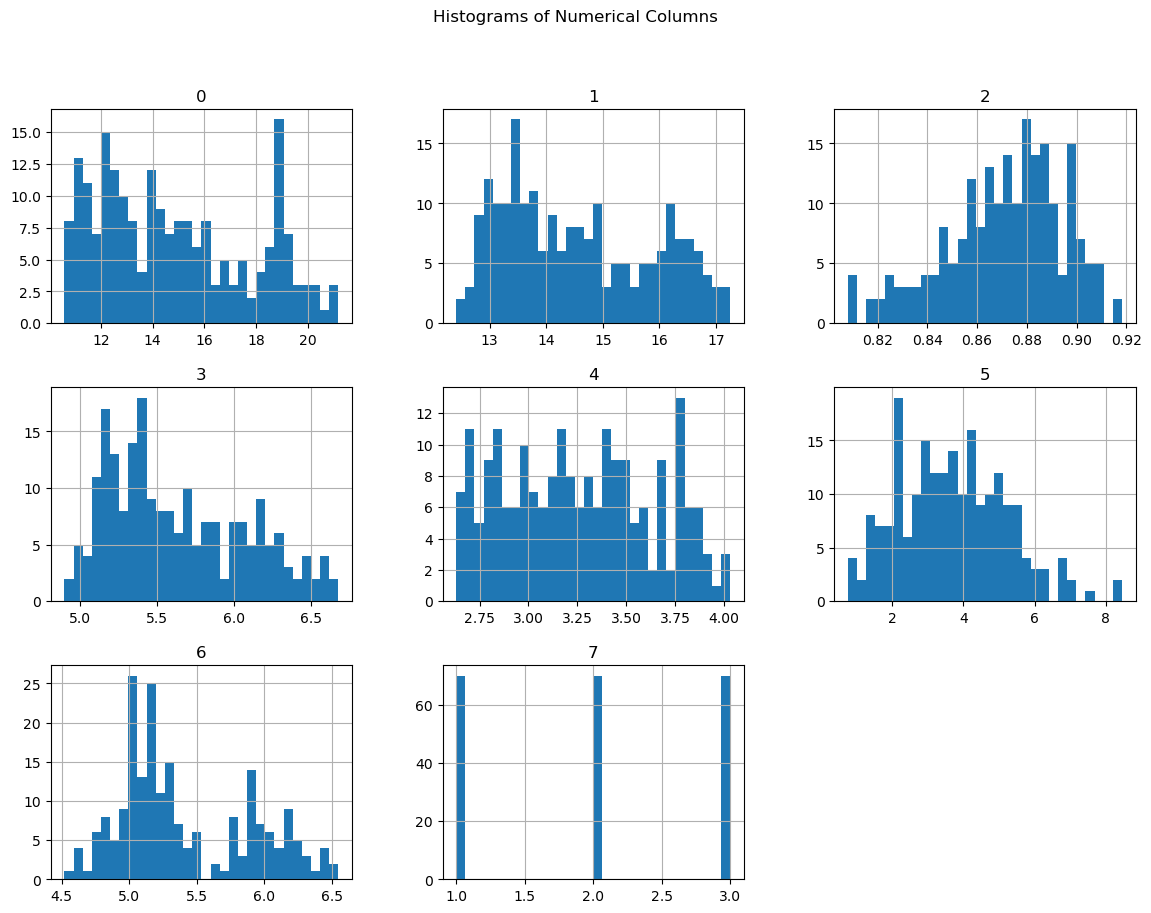

In [49]:
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
len(X_train_scaled)

168

In [52]:
len(X_test_scaled)

42

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Tree = DecisionTree(max_depth=4, entropy_threshold=0.7)
Tree.fit(X_train_scaled, y_train)
y_pred = Tree.predict(X_test_scaled)
cv_scores = cross_val_score(Tree, X_scaled, y, cv=5, scoring='accuracy')
print(f"DecisionTree Cross-Validation Scores: {cv_scores}")
print(f"DecisionTree Mean Accuracy: {cv_scores.mean()}")
cm_DecisionTree = confusion_matrix(y_test, y_pred)
cm_DecisionTree

DecisionTree Cross-Validation Scores: [0.57142857 0.78571429 0.97619048 0.83333333 0.78571429]
DecisionTree Mean Accuracy: 0.7904761904761906


array([[ 8,  0,  3],
       [ 0, 14,  0],
       [ 5,  0, 12]], dtype=int64)

In [55]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pre = log_reg.predict(X_test_scaled)
cv_scores_lr = cross_val_score(log_reg, X_scaled, y, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cv_scores_lr}")
print(f"Logistic Regression Mean Accuracy: {cv_scores_lr.mean()}")
cm_LogisticRegression = confusion_matrix(y_test, y_pred)
cm_LogisticRegression

Logistic Regression Cross-Validation Scores: [0.97619048 0.97619048 0.92857143 0.95238095 0.78571429]
Logistic Regression Mean Accuracy: 0.9238095238095237


array([[ 8,  0,  3],
       [ 0, 14,  0],
       [ 5,  0, 12]], dtype=int64)

In [56]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
cv_scores_svm = cross_val_score(svm, X_scaled, y, cv=5)
cm_SVC = confusion_matrix(y_test, y_pred)
print(f"SVM Cross-Validation Scores: {cv_scores_svm}")
print(f"SVM Mean Accuracy: {cv_scores_svm.mean()}")
cm_SVC

SVM Cross-Validation Scores: [0.97619048 0.95238095 0.92857143 0.95238095 0.76190476]
SVM Mean Accuracy: 0.9142857142857143


array([[ 9,  0,  2],
       [ 0, 14,  0],
       [ 2,  0, 15]], dtype=int64)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
cv_scores_knn = cross_val_score(knn, X_scaled, y, cv=5)
cm_KNN = confusion_matrix(y_test, y_pred)
print(f"KNN Cross-Validation Scores: {cv_scores_knn}")
print(f"KNN Mean Accuracy: {cv_scores_knn.mean()}")
cm_KNN

KNN Cross-Validation Scores: [0.97619048 0.92857143 0.95238095 0.92857143 0.78571429]
KNN Mean Accuracy: 0.9142857142857143


array([[ 9,  0,  2],
       [ 0, 14,  0],
       [ 3,  0, 14]], dtype=int64)

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
cv_scores_nb = cross_val_score(nb, X_scaled, y, cv=5)
cm_NB = confusion_matrix(y_test, y_pred)
print(f"Naive Bayes Cross-Validation Scores: {cv_scores_nb}")
print(f"Naive Bayes Mean Accuracy: {cv_scores_nb.mean()}")
cm_NB

Naive Bayes Cross-Validation Scores: [0.88095238 0.92857143 0.95238095 0.97619048 0.69047619]
Naive Bayes Mean Accuracy: 0.8857142857142858


array([[ 8,  1,  2],
       [ 1, 13,  0],
       [ 2,  0, 15]], dtype=int64)

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
cv_scores_tree = cross_val_score(tree, X_scaled, y, cv=5)
cm_Tree = confusion_matrix(y_test, y_pred)
print(f"Decision Tree Cross-Validation Scores: {cv_scores_tree}")
print(f"Decision Tree Mean Accuracy: {cv_scores_tree.mean()}")
cm_Tree

Decision Tree Cross-Validation Scores: [0.95238095 0.83333333 0.83333333 0.95238095 0.88095238]
Decision Tree Mean Accuracy: 0.8904761904761905


array([[10,  0,  1],
       [ 0, 14,  0],
       [ 4,  0, 13]], dtype=int64)

In [60]:
LR = LRegression(0.01,1000)
LR.fit(X_train_scaled,y_train)
y_pred_lr = LR.predict(X_test_scaled)
cv_scores_lr = cross_val_score(LR, X_scaled, y, cv=5)
cm_LR = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression(Custom Implementation) Cross-Validation Scores: {cv_scores_lr}")
print(f"Logistic Regression(Custom Implementation) Mean Accuracy: {cv_scores_lr.mean()}")
cm_LR

Logistic Regression(Custom Implementation) Cross-Validation Scores: [0.30952381 0.35714286 0.04761905 0.23809524 0.        ]
Logistic Regression(Custom Implementation) Mean Accuracy: 0.19047619047619052


array([[ 6,  5,  0],
       [ 6,  8,  0],
       [ 1, 16,  0]], dtype=int64)

##### Здесь мы используем функцию sigmoid, которая может обрабатывать только задачу бинарной классификации, поэтому модель генерирует 4 класса, что приводит к очень низкой точности.

In [67]:
class LRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
###############      new function      #############
    def softmax(self, z):
        e_z = np.exp(z - np.max(z))
        return e_z / e_z.sum(axis=1, keepdims=True) 
####################################################
    def initialize_parameters(self, n_features, n_classes):
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros((1, n_classes))
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.initialize_parameters(n_features, n_classes)
        y = y.values
        y_one_hot = np.zeros((n_samples, n_classes))
        for i in range(n_samples):
            y_one_hot[i, y[i]] = 1
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / n_samples) * np.sum(y_predicted - y_one_hot, axis=0, keepdims=True)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_model)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'num_iterations': self.num_iterations}
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [68]:
print(np.unique(y_train)) 

[0 1 2]


In [69]:
LR = LRegression(0.01,1000)
LR.fit(X_train_scaled,y_train)
y_pred_lr = LR.predict(X_test_scaled)
cv_scores_lr = cross_val_score(LR, X_scaled, y, cv=5)
cm_LR = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression(Custom Implementation) Cross-Validation Scores: {cv_scores_lr}")
print(f"Logistic Regression(Custom Implementation) Mean Accuracy: {cv_scores_lr.mean()}")
cm_LR

Logistic Regression(Custom Implementation) Cross-Validation Scores: [0.69047619 0.80952381 0.97619048 0.95238095 0.83333333]
Logistic Regression(Custom Implementation) Mean Accuracy: 0.8523809523809524


array([[10,  0,  1],
       [ 0, 14,  0],
       [ 2,  0, 15]], dtype=int64)

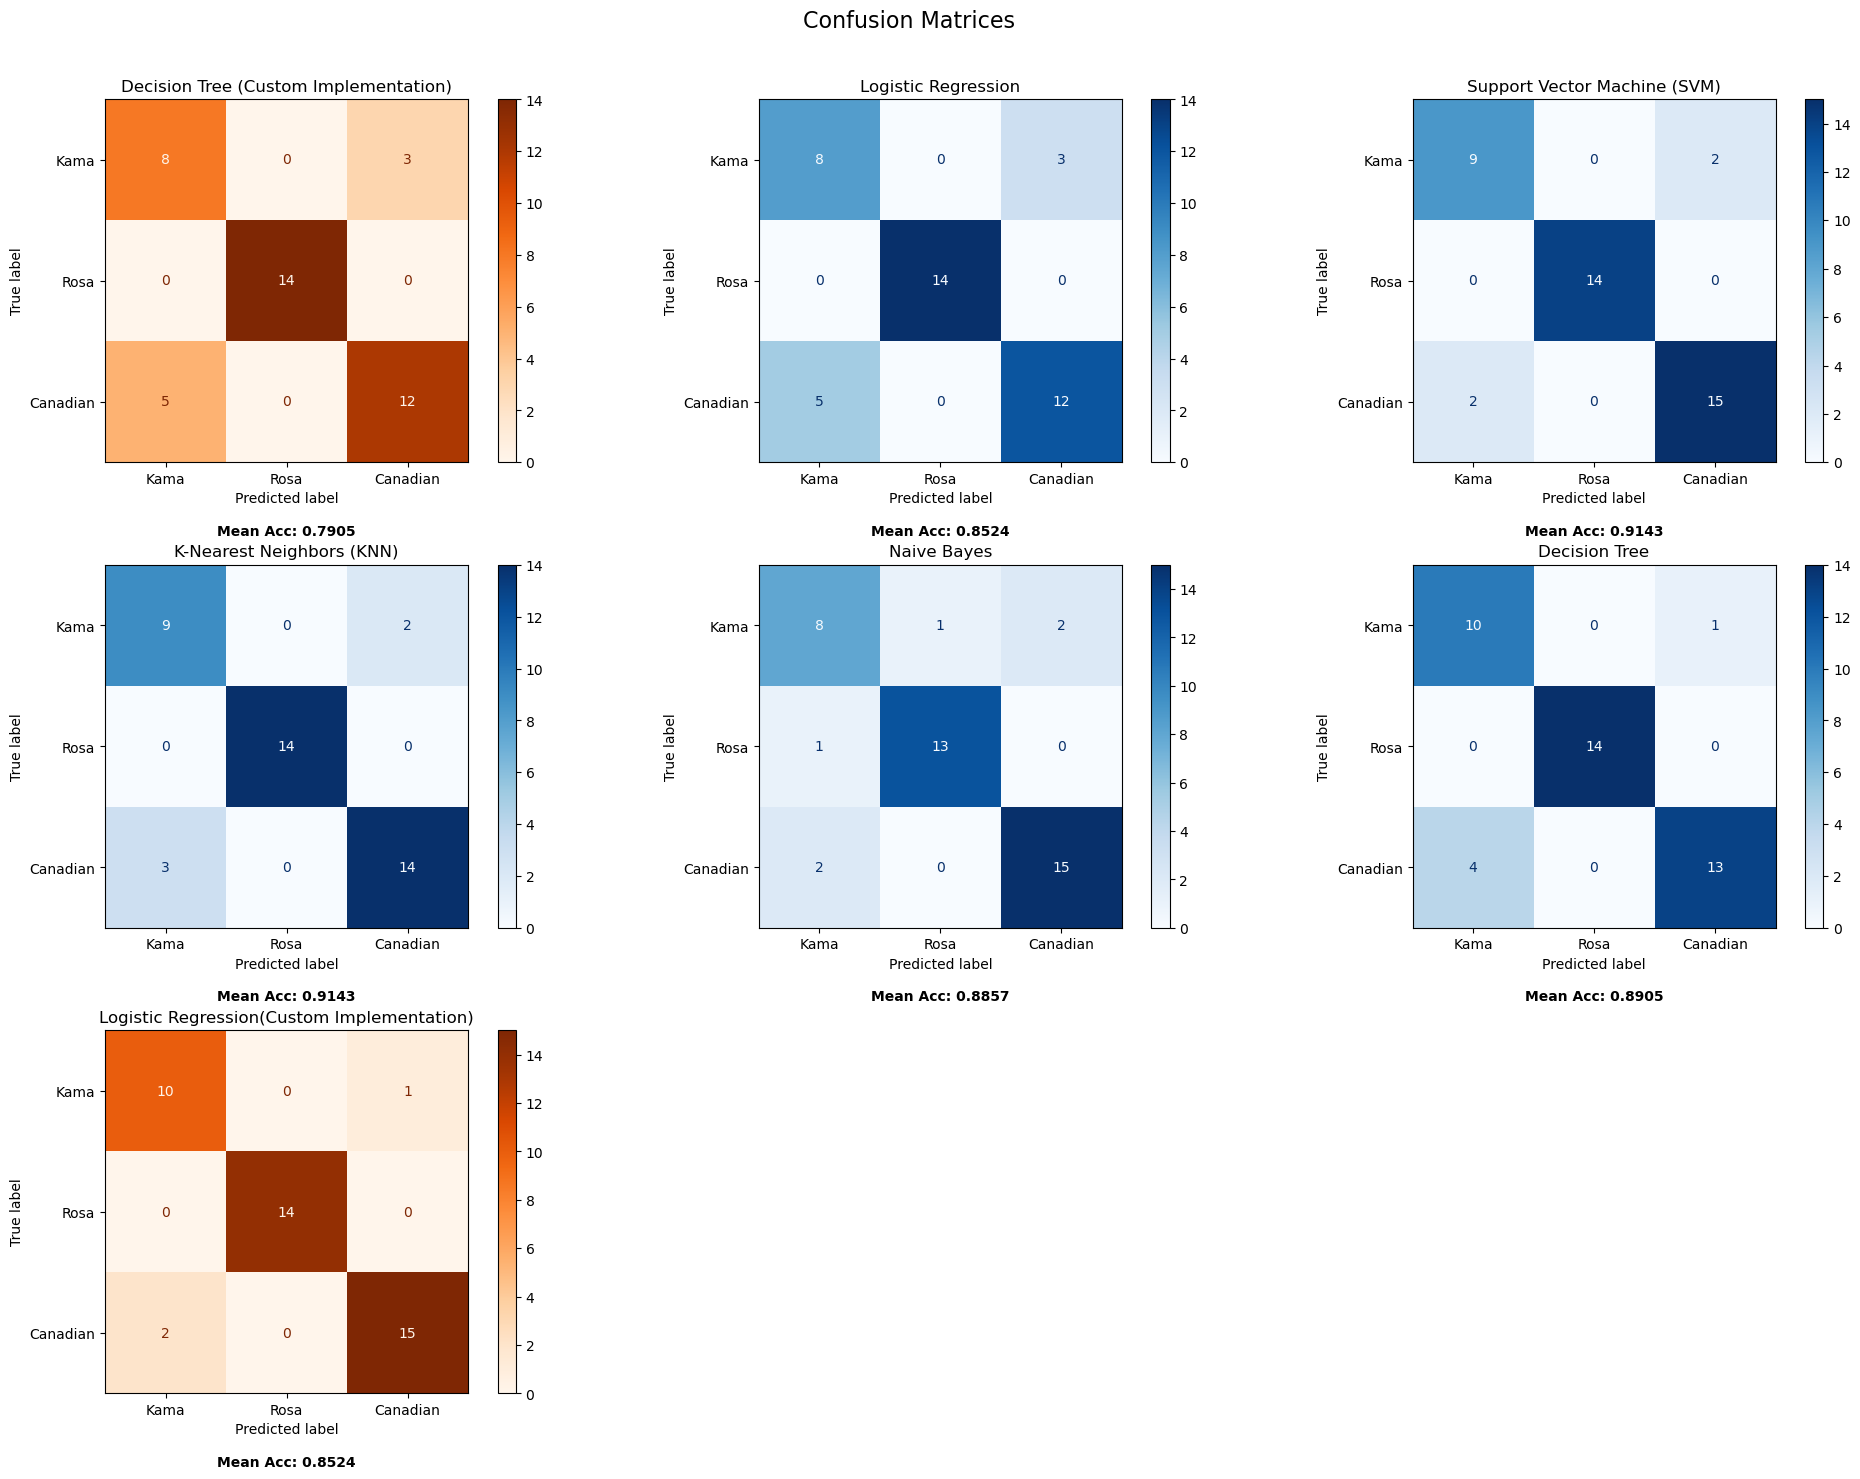

In [70]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
display_labels = ["Kama","Rosa","Canadian"]

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_DecisionTree, display_labels=display_labels)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_LogisticRegression, display_labels=display_labels)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_SVC, display_labels=display_labels)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=display_labels)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=display_labels)
disp_Tree = ConfusionMatrixDisplay(confusion_matrix=cm_Tree, display_labels=display_labels)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=display_labels)

disp_tree.plot(cmap='Oranges', ax=axes[0, 0])
axes[0, 0].set_title("Decision Tree (Custom Implementation)")
axes[0, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores.mean()):.4f}", 
                transform=axes[0, 0].transAxes, ha='center',weight='bold')
disp_log_reg.plot(cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Logistic Regression")
axes[0, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_lr.mean()):.4f}", 
                transform=axes[0, 1].transAxes, ha='center',weight='bold')
disp_svc.plot(cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title("Support Vector Machine (SVM)")
axes[0, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_svm.mean()):.4f}", 
                transform=axes[0, 2].transAxes, ha='center',weight='bold')
disp_knn.plot(cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title("K-Nearest Neighbors (KNN)")
axes[1, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores_knn.mean()):.4f}", 
                transform=axes[1, 0].transAxes, ha='center',weight='bold')
disp_nb.plot(cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title("Naive Bayes")
axes[1, 1].text(0.5, -0.2, f"Mean Acc: {(cv_scores_nb.mean()):.4f}", 
                transform=axes[1, 1].transAxes, ha='center',weight='bold')
disp_Tree.plot(cmap='Blues', ax=axes[1, 2])
axes[1, 2].set_title("Decision Tree")
axes[1, 2].text(0.5, -0.2, f"Mean Acc: {(cv_scores_tree.mean()):.4f}", 
                transform=axes[1, 2].transAxes, ha='center',weight='bold')

disp_lr.plot(cmap='Oranges', ax=axes[2, 0])
axes[2, 0].set_title("Logistic Regression(Custom Implementation)")
axes[2, 0].text(0.5, -0.2, f"Mean Acc: {(cv_scores_lr.mean()):.4f}", 
                transform=axes[2, 0].transAxes, ha='center',weight='bold')

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])


plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()